<a href="https://colab.research.google.com/github/clondo/Returns-Chart/blob/main/twitter_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install fredapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install b2a_base64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement b2a_base64 (from versions: none)
ERROR: No matching distribution found for b2a_base64


In [ ]:
import pandas as pd
from fredapi import Fred
import datetime

# set up fred API key
fred = Fred(api_key='3a63be0c8c6e1f6f4fc09c881bfda3c9')

# set start and end date for data
end_date = datetime.date.today()
start_date = end_date - pd.DateOffset(years=5)

# retrieve U6 unemployment rate data
u6_unemployment = fred.get_series('U6RATE', start_date, end_date)

# calculate month-to-month change in U6 unemployment rate
u6_unemployment_change = u6_unemployment.pct_change()

# retrieve inflation rate data
inflation = fred.get_series('CPALTT01USM657N', start_date, end_date)

# calculate month-to-month change in inflation rate
inflation_change = inflation.pct_change()

# combine the two series into a single dataframe
df = pd.concat([u6_unemployment_change, inflation_change], axis=1, keys=['U6 Unemployment Rate Change', 'Inflation Rate Change'])

# drop rows with NaN values
df.dropna(inplace=True)

# print the resulting dataframe
print(df)


            U6 Unemployment Rate Change  Inflation Rate Change
2018-06-01                     0.000000              -0.616757
2018-07-01                    -0.038462              -0.957673
2018-08-01                    -0.013333               7.234739
2018-09-01                     0.013514               1.091695
2018-10-01                     0.000000               0.520418
2018-11-01                     0.013333              -2.895754
2018-12-01                     0.000000              -0.046393
2019-01-01                     0.052632              -1.596938
2019-02-01                    -0.100000               1.217067
2019-03-01                     0.027778               0.334584
2019-04-01                     0.000000              -0.061396
2019-05-01                    -0.027027              -0.597968
2019-06-01                     0.000000              -0.906449
2019-07-01                    -0.041667               7.390486
2019-08-01                     0.043478              -1

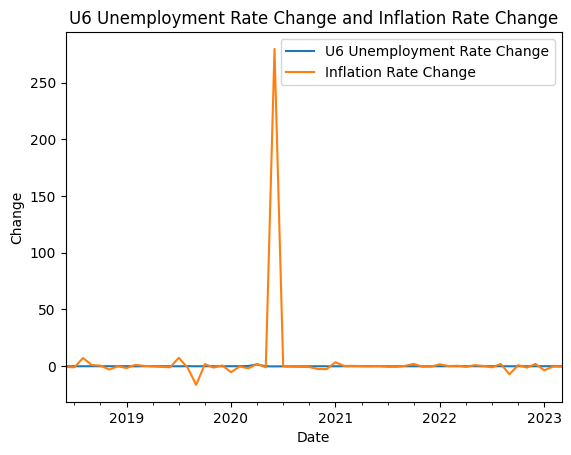

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import datetime

# set up fred API key
fred = Fred(api_key='3a63be0c8c6e1f6f4fc09c881bfda3c9')

# set start and end date for data
end_date = datetime.date.today()
start_date = end_date - pd.DateOffset(years=5)

# retrieve U6 unemployment rate data
u6_unemployment = fred.get_series('U6RATE', start_date, end_date)

# calculate month-to-month change in U6 unemployment rate
u6_unemployment_change = u6_unemployment.pct_change()

# retrieve inflation rate data
inflation = fred.get_series('CPALTT01USM657N', start_date, end_date)

# calculate month-to-month change in inflation rate
inflation_change = inflation.pct_change()

# combine the two series into a single dataframe
df = pd.concat([u6_unemployment_change, inflation_change], axis=1, keys=['U6 Unemployment Rate Change', 'Inflation Rate Change'])

# drop rows with NaN values
df.dropna(inplace=True)

# plot the dataframe as a line chart
df.plot.line()

# set the title and axis labels
plt.title('U6 Unemployment Rate Change and Inflation Rate Change')
plt.xlabel('Date')
plt.ylabel('Change')

# display the plot
plt.show()


Correlation between CPI ex energy and PPI crude petroleum: 0.7111715563399899


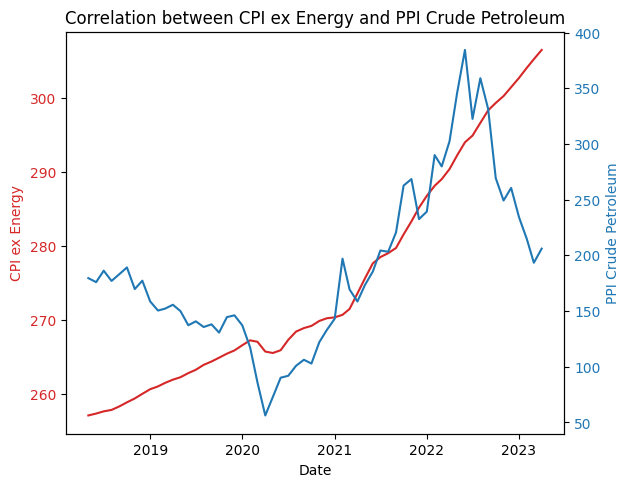

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import datetime

# set up fred API key
fred = Fred(api_key='3a63be0c8c6e1f6f4fc09c881bfda3c9')

# set start and end date for data
end_date = datetime.date.today()
start_date = end_date - pd.DateOffset(years=5)

# retrieve CPI data excluding energy
cpi_ex_energy = fred.get_series('CPILFESL', start_date, end_date)

# retrieve PPI data for crude petroleum and natural gas extraction
ppi_crude_petroleum = fred.get_series('PCU211111211111', start_date, end_date)

# calculate the correlation coefficient between CPI ex energy and PPI crude petroleum
correlation = cpi_ex_energy.corr(ppi_crude_petroleum)

# print the correlation coefficient
print(f'Correlation between CPI ex energy and PPI crude petroleum: {correlation}')

# plot the data as a line chart
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI ex Energy', color=color)
ax1.plot(cpi_ex_energy.index, cpi_ex_energy, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('PPI Crude Petroleum', color=color)
ax2.plot(ppi_crude_petroleum.index, ppi_crude_petroleum, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Correlation between CPI ex Energy and PPI Crude Petroleum')
plt.show()


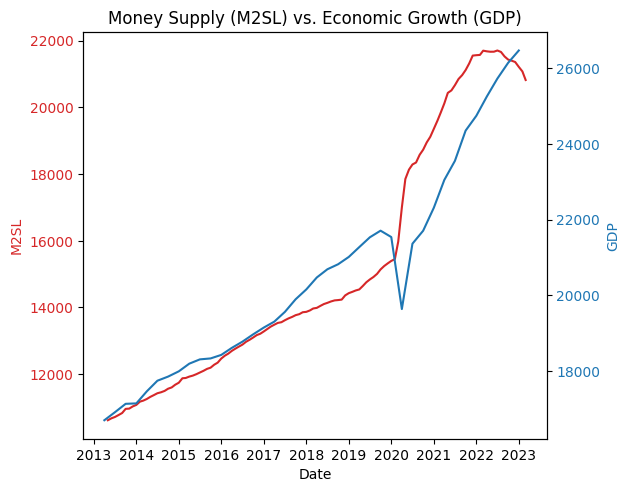

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import datetime

# set up fred API key
fred = Fred(api_key='3a63be0c8c6e1f6f4fc09c881bfda3c9')

# set start and end date for data
end_date = datetime.date.today()
start_date = end_date - pd.DateOffset(years=10)

# retrieve M2SL and GDP data
m2sl = fred.get_series('M2SL', start_date, end_date)
gdp = fred.get_series('GDP', start_date, end_date)

# plot the data as a line chart
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('M2SL', color=color)
ax1.plot(m2sl.index, m2sl, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('GDP', color=color)
ax2.plot(gdp.index, gdp, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Money Supply (M2SL) vs. Economic Growth (GDP)')
plt.show()


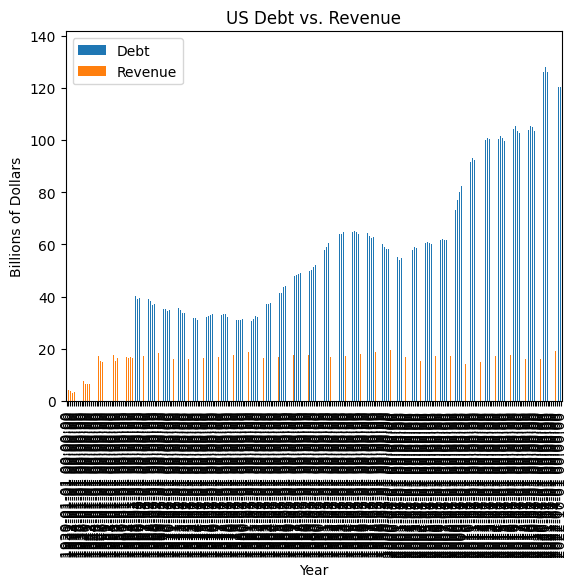

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import fredapi

fred = fredapi.Fred(api_key='3a63be0c8c6e1f6f4fc09c881bfda3c9') # Replace with your FRED API key

# set up FRED series IDs for debt and revenue data
debt_series_id = 'GFDEGDQ188S'
revenue_series_id = 'FYFRGDA188S'

# set up date range for data retrieval
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=365*5)).strftime('%Y-%m-%d')

# retrieve debt and revenue data from FRED
debt_data = fred.get_series(debt_series_id, start_date=start_date, end_date=end_date)
revenue_data = fred.get_series(revenue_series_id, start_date=start_date, end_date=end_date)

# combine debt and revenue data into a single DataFrame
data = pd.concat([debt_data, revenue_data], axis=1)
data.columns = ['Debt', 'Revenue']

# plot the data as a bar chart
data.plot(kind='bar')
plt.title('US Debt vs. Revenue')
plt.xlabel('Year')
plt.ylabel('Billions of Dollars')
plt.show()


In [ ]:
pip install fredapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


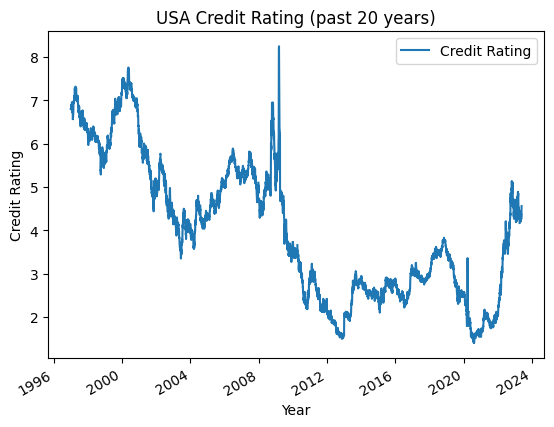

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Replace YOUR_API_KEY with your FRED API key
fred = Fred(api_key='3a63be0c8c6e1f6f4fc09c881bfda3c9')

# Define the series ID for the USA credit rating
credit_rating_id = 'BAMLC0A1CAAAEY'

# Retrieve the data for the past 20 years
start_date = "2015-01-01"
credit_rating_data = fred.get_series(credit_rating_id, start_date=start_date)

# Create a DataFrame with the credit rating data
credit_rating_df = pd.DataFrame({'Credit Rating': credit_rating_data})

# Plot the data as a line chart
ax = credit_rating_df.plot(kind='line')
ax.set_xlabel('Year')
ax.set_ylabel('Credit Rating')
ax.set_title('USA Credit Rating (past 20 years)')
plt.show()


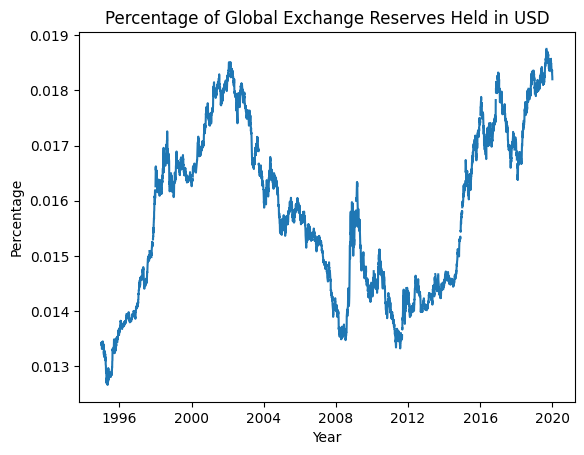

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Define FRED API endpoint and API key
FRED_API_ENDPOINT = "https://api.stlouisfed.org/fred/series/observations"
API_KEY = "3a63be0c8c6e1f6f4fc09c881bfda3c9"

# Define series ID for percentage of global exchange reserves held in USD
SERIES_ID = "DTWEXB"

# Set start and end dates for data retrieval
start_date = "1950-05-01"
end_date = "2021-05-01"

# Construct API request URL
url = FRED_API_ENDPOINT + "?series_id=" + SERIES_ID + "&api_key=" + API_KEY + "&observation_start=" + start_date + "&observation_end=" + end_date + "&file_type=json"

# Send GET request to FRED API and store response
response = requests.get(url)

# Extract data from response JSON and convert to pandas DataFrame
data = response.json()["observations"]
df = pd.DataFrame(data)
df["date"] = pd.to_datetime(df["date"])
df["value"] = pd.to_numeric(df["value"].replace(".", "NaN"), errors="coerce")
df.set_index("date", inplace=True)

# Calculate percentage of exchange reserves held in USD
total = df["value"].sum()
df["pct"] = df["value"] / total * 100

# Plot percentage of exchange reserves held in USD over time
plt.plot(df.index, df["pct"])
plt.title("Percentage of Global Exchange Reserves Held in USD")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.show()

In [ ]:
pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=8f459218b355fa5a8221895f827fabfc07b76cfc7242b9ab25a0cbc5260dfd77
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [ ]:
pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install talib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib


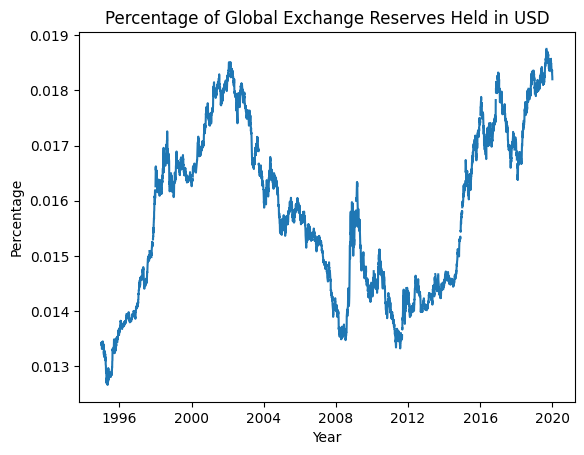

NameError: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Define FRED API endpoint and API key
FRED_API_ENDPOINT = "https://api.stlouisfed.org/fred/series/observations"
API_KEY = "3a63be0c8c6e1f6f4fc09c881bfda3c9"

# Define series ID for percentage of global exchange reserves held in USD
SERIES_ID = "DTWEXB"

# Set start and end dates for data retrieval
start_date = "1950-05-01"
end_date = "2021-05-01"

# Construct API request URL
url = FRED_API_ENDPOINT + "?series_id=" + SERIES_ID + "&api_key=" + API_KEY + "&observation_start=" + start_date + "&observation_end=" + end_date + "&file_type=json"

# Send GET request to FRED API and store response
response = requests.get(url)

# Extract data from response JSON and convert to pandas DataFrame
data = response.json()["observations"]
df = pd.DataFrame(data)
df["date"] = pd.to_datetime(df["date"])
df["value"] = pd.to_numeric(df["value"].replace(".", "NaN"), errors="coerce")
df.set_index("date", inplace=True)

# Calculate percentage of exchange reserves held in USD
total = df["value"].sum()
df["pct"] = df["value"] / total * 100

# Plot percentage of exchange reserves held in USD over time
plt.plot(df.index, df["pct"])
plt.title("Percentage of Global Exchange Reserves Held in USD")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.show()

# Save the plot to a file
plt.savefig("percentage_of_global_exchange_reserves_held_in_usd.png")

# Create a new HTML file
html = """
<!DOCTYPE html>
<html>
<head>
<title>Percentage of Global Exchange Reserves Held in USD</title>
</head>
<body>
<img src="percentage_of_global_exchange_reserves_held_in_usd.png" alt="Percentage of Global Exchange Reserves Held in USD">
</body>
</html>
"""

# Write the HTML file to disk
with open("percentage_of_global_exchange_reserves_held_in_usd.html", "w") as f:
    f.write(html)

# Open the HTML file in a web browser
webbrowser.open("percentage_of_global_exchange_reserves_held_in_usd.html")


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Get the list of cannabis stocks
stocks = ["APHA", "TLRY", "CRON", "ACB", "CGC"]

# Create a DataFrame to store the data
df = pd.DataFrame()

# Loop through the stocks and gather the data
for stock in stocks:

    # Get the URL for the stock's profile page
    url = f"https://finance.yahoo.com/quote/{stock}/profile?p={stock}"

    # Make a request to the URL
    response = requests.get(url)

    # Parse the response data
    data = response.json()

    # Find the sales and income
    sales = data["financials"]["ttm"]["totalRevenue"]
    income = data["financials"]["ttm"]["netIncome"]

    # Add the data to the DataFrame
    df = df.append({"stock": stock, "sales": sales, "income": income}, ignore_index=True)

# Calculate the sales/income ratio
df["sales_income_ratio"] = df["sales"] / df["income"]

# Plot the sales/income ratio
plt.bar(df["stock"], df["sales_income_ratio"], label="Sales/Income Ratio")

# Add a title and labels to the graph
plt.title("Sales/Income Ratio of Cannabis Stocks")
plt.xlabel("Stock")
plt.ylabel("Ratio")
plt.legend()

# Show the graph
plt.show()


JSONDecodeError: ignored